# DPLL Algorithm for CNF Satifiability

## Abstract

+ In propositional logic, we say $ KB \models \alpha $ if and only if $ M(KB) \subseteq M(\alpha) $ as shown in the figure below 
    + where $ KB $ is the knowledge base
    + $ M(KB) $ is set of all models of $ KB $
    + $ M(\alpha) $ is set of all models of $ \alpha $
+ $ KB \models \alpha $ means that $ \alpha $ is true in all the worlds where $ KB $ is true

Populating the interactive namespace from numpy and matplotlib


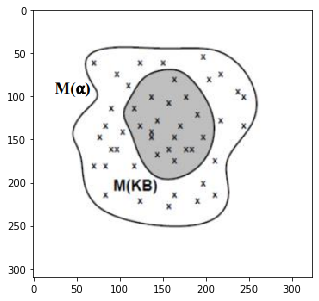

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline
plt.figure(figsize=(5,5))
img = mpimg.imread('entailment.png')
imgplot = plt.imshow(img)
plt.show()

+ ***Validity :*** A sentence is valid if and only if it is $ True $ in all models
    + Ex. $ A \lor \neg A $
+ ***Unsatisfiability :*** A sentence is unsatisfiable if and only if it is $ False $ in all models
    + Ex. $ A \land \neg A $
+ ***Satisfiability :*** A sentence is satisfiable if and only if it is $ True $ in some models
    + Ex. $ A \lor B $, $ C $
+ Validity is connected to Inference via Deduction theorem.
    + i.e $ KB \models \alpha $ if and only if ($ KB \rightarrow \alpha $) is valid
+ Satisfiability is connected to Inference via Deduction theorem.
    + i.e $ KB \models \alpha $ if and only if ($ KB \land \neg \alpha $) is unsatisfiable
+ Hence, ($ KB \land \neg \alpha $) can be converted to CNF-form and passed to DPLL
+ If, DPLL return that CNF form of ($ KB \land \neg \alpha $) is unsatisfiable then $ KB \models \alpha $ else $ KB \not\models \alpha $

## Algorithm Description :

+ ***DPLL Algorithm*** consists of the following parts :
    + 1. ***Find unit clause*** and assign them value so that it becomes true
    + 2. ***Check for Contradictions for unit clause.*** If contradiction is found, thhen CNF is unsatisfiable.
    + 3. ***Simplify CNF from unit clause*** by removing clauses containing ***unit clause*** and removing ***literals which are NOT(unit clause)*** from any clause 
    + 4. ***Choose some literal :*** choose the literal with the highest frequency from CNF
    + 5. ***Check for Contradictions for chosen literal :*** If contradiction is found, thhen CNF is unsatisfiable.
    + 6. ***Simplify CNF from chosen literal*** by removing clauses containing ***chosen literal*** and removing ***literals which are NOT(chosen literal)*** from any clause 
    + 7. ***Pass CNF from step-6*** to DPLL.
    + 8. ***If step-7 returns 'unsatisfiable' :*** repeat step-6 with NOT(chosen literal from step-4)
    + 9. ***If step-8 also return 'unsatisfiable' :*** CNF is unsatisfiable.
    + 10. ***Base-Case : If CNF becomes empty*** at any point, then CNF is satisfiable.

# <a id='index'>Index</a>

+ <a href='#unit_clauses'>1. Finding Unit Clause</a>
+ <a href='#simplify'>2. Simplifying the CNF Clauses by using a literal</a>
+ <a href='#choose_literal'>3. Choosing the literal that occurs in most of the cluases to simplfy</a>
+ <a href='#check_contradictions'>4. Check for contradictory unit clauses</a>
+ <a href='#dpll'>5. DPLL for CNF Satisfiability</a>
+ <a href='#example'>6. Examples</a>
     + <a href='#exec1'>6.1 Example 1</a>
     + <a href='#exec2'>6.2 Example 2</a>
     + <a href='#exec3'>6.3 Example 3</a>
     + <a href='#exec4'>6.4 Example 4</a>
+ <a href='#large_cnf'>7. Large CNF Clauses</a>
+ <a href='#final'>8. Final Remarks</a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  

# <a id='unit_clauses'>1. Finding Unit Clause</a>
<a href='#index'>Go back to the top</a>

In [7]:
def find_unit_clause(s):
    for clause in s:
        # check if there is any clause with length 1 i.e unit clause aand return it
        if len(clause) == 1:
            print("Unit clause found :",clause[0])
            return clause[0]
    return 'not_found'
            
## example
s = [['!A'],
     ['!A','B','C'],
     ['!B','C'],
     ['B']
    ]
unit_clause = find_unit_clause(s)

s = [['!A','B','C'],
     ['!B','C']
    ]
unit_clause = find_unit_clause(s)
if unit_clause == 'not_found':
    print('Unit clause not found')

Unit clause found : !A
Unit clause not found


# <a id='simplify'>2. Simplifying the CNF Clauses by using a literal</a>
<a href='#index'>Go back to the top</a>

In [8]:
def simplify(s,literal):
    simplified_clauses = []
    # if unit_clause does not contain negation
    # assign True to unit_clause
    if literal[0] != '!':
        # remove any literal from every clause that is !(unit_clause)
        for clause in s:
            if ('!'+literal) in clause:
                clause.remove('!'+literal)
        # remove any clause that contains literal=(unit_clause)
        for clause in s:
            if literal in clause:
                clause.clear()
        simplified_clauses = [clause for clause in s if clause != []]
        print("After simplification :")
        for clause in simplified_clauses:
            print(clause)
        return simplified_clauses
    # if unit_clause contains negation
    # assign False to literal of unit_clause so that unit_clause becomes True
    else :
        # remove any literal from every clause that is (unit_clause)
        for clause in s:
            if literal[1] in clause:
                clause.remove(literal[1])
        # remove any clause that contains literal= !(unit_clause)
        for clause in s:
            if literal in clause:
                clause.clear()
        simplified_clauses = [clause for clause in s if clause != []]
        print("After simplification :")
        for clause in simplified_clauses:
            print(clause)
        return simplified_clauses
## example
s = [['!A'],
     ['A','B','!C'],
     ['!A','B','C'],
     ['!B','C'],
     ['B']
    ]
unit_clause = find_unit_clause(s)
s = simplify(s,unit_clause)

unit_clause = find_unit_clause(s)
s = simplify(s,unit_clause)

Unit clause found : !A
After simplification :
['B', '!C']
['!B', 'C']
['B']
Unit clause found : B
After simplification :
['C']


# <a id='choose_literal'>3. Choosing the literal that occurs in most of the cluases to simplfy</a>
<a href='#index'>Go back to the top</a>

In [9]:
def choose_literal(s):
    all_symbols = []
    symbols = []
    for clause in s:
        for literal in clause:
                # add all occureneces of all symbols to 'all_symbols'
                all_symbols.append(literal)
                # add symbols uniquely to 'symbols'
                if literal not in symbols:
                    symbols.append(literal)
    freq = []               
    # find frequency of symbols in CNF
    for i in range(len(symbols)):
        freq.append(all_symbols.count(symbols[i]))
    symbol_freq = []
    for i in range(len(freq)):
        symbol_freq.append((symbols[i],freq[i]))
    # sort symbols from CNF based on their frequency of occurence in descending order
    symbol_freq.sort(key = lambda x: x[1])
    symbol_freq.reverse()
    print("Chosen Literal :",symbol_freq[0][0])
    # return the literal with the highest occurence
    return symbol_freq[0][0]

s = [['A','B','!C'],
     ['!A','B','C'],
     ['!B','C']
    ]

chosen_literal = choose_literal(s)

Chosen Literal : C


# <a id='check_contradictions'>4. Check for contradictory unit clauses</a>
<a href='#index'>Go back to the top</a>

In [10]:
def check_for_contradictions(s,unit_clause):
    positive = False
    negative = False
    # temp_unit_clause contains the symbol from literal(unit_clause)
    # if unit_clause = A then temp_unit_clause = A
    # if unit_clause = !A then temp_unit_clause = A
    if unit_clause[0] == '!':
        temp_unit_clause = unit_clause[1]
    else :
        temp_unit_clause = unit_clause
    for clause in s:
        if len(clause) == 1:
            if clause[0][0] == '!' and clause[0][1] == temp_unit_clause:
                negative = True
            if clause[0][0] == temp_unit_clause:
                positive = True
    if negative and positive:
        print("Contradiction",temp_unit_clause,"and !",temp_unit_clause,"found")
        return True
    
s = [['A','B','!C'],
     ['!A','B','C'],
     ['!B','C'],
     ['D'],
     ['!D']
    ]

unit_clause = find_unit_clause(s)
check_for_contradictions(s,unit_clause)

Unit clause found : D
Contradiction D and ! D found


True

# <a id='dpll'>5. DPLL for CNF Satisfiability</a>
<a href='#index'>Go back to the top</a>

In [11]:
def dpll(s,assignments):
    # base case for recursion
    if len(s) == 0:
        return 'satisfiable'
    while(True):
        print("\n-------------------------------------------------------------------------------------------------------------------------")
        print("Assignments till now:",assignments)
        unit_clause = find_unit_clause(s)
        if unit_clause == 'not_found':
            print('Unit clause not found')
            break
        # check for contradictions
        if check_for_contradictions(s,unit_clause) == True:
            assignments.clear()
            return 'unsatisfiable'
        else:
            print(unit_clause,' added to assignments')
            assignments.append(unit_clause)
            s = simplify(s,unit_clause)
    if len(s) == 0:
        return 'satisfiable'
    print("\n-------------------------------------------------------------------------------------------------------------------------")
    print("Assignments till now:",assignments)
    literal = choose_literal(s)
    # if literal is in negative form i.e !A
    if literal[0] == '!':
        temp_literal = literal[1]
        assignments.append(literal)
        print(literal,' added to assignments')
        # recursively call dpll with !A
        if dpll(simplify(s,literal),assignments) == 'satisfiable':
            return 'satisfiable'
        # if !A i.e false value of A, returns unsatisfiable
        else :
            print(literal,' does not satisfy CNF')
            print('\nBacktracking...\n')
            # remove !A from assignments
            if literal in assignments :
                assignments.remove(literal)
            # append A to assignments
            assignments.append(temp_literal)
            print(temp_literal,' added to assignments')
            # recursively call dpll,this time with !(!A) ie A
            return dpll((simplify(s,temp_literal)),assignments)
    # if literal is in positive form i.e A
    else:
        assignments.append(literal)
        print(literal,' added to assignments')
        # recursively call dpll with A
        if dpll(simplify(s,literal),assignments) == 'satisfiable':
            return 'satisfiable'
        # if A i.e True value of A, returns unsatisfiable
        else :
            print(literal,' does not satisfy CNF')
            print('\nBacktracking...\n')
            # remove A from assignments
            if literal in assignments :
                assignments.remove(literal)
            # append !A to assignments
            assignments.append('!'+literal)
            print('!'+literal,' added to assignments')
            # recursively call dpll,this time with !(A) ie !A
            return dpll((simplify(s,('!'+temp_literal))),assignments)

In [12]:
def print_assignments(assignments):
    for assgn in assignments:
        if assgn[0] == '!':
            print(assgn[1],'= False')
        else:
            print(assgn,' = True')

# <a id='example'>6. Examples</a>
<a href='#index'>Go back to the top</a>

## <a id='exec1'>6.1 Example 1 (from the class) </a>

Populating the interactive namespace from numpy and matplotlib


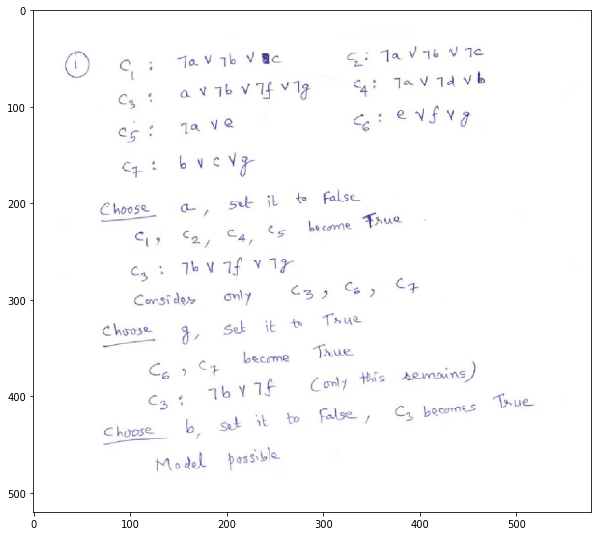

In [13]:
%pylab inline
plt.figure(figsize=(10,10))
img = mpimg.imread('example1.png')
imgplot = plt.imshow(img)
plt.show()

In [14]:
s = [['!a','!b','c'],['!a','!b','!c'],['a','!b','!f','!g'],['!a','!d','b'],['!a','e'],['e','f','g'],['b','c','g']]
for clause in s:
    print(clause)
assignments=[]
if dpll(s,assignments) == 'satisfiable':
    print('Given CNF is satisfiable for the following assignments :')
    print_assignments(assignments)
else:
    print('unsatisfiable')

['!a', '!b', 'c']
['!a', '!b', '!c']
['a', '!b', '!f', '!g']
['!a', '!d', 'b']
['!a', 'e']
['e', 'f', 'g']
['b', 'c', 'g']

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: []
Unit clause not found

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: []
Chosen Literal : !a
!a  added to assignments
After simplification :
['!b', '!f', '!g']
['e', 'f', 'g']
['b', 'c', 'g']

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: ['!a']
Unit clause not found

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: ['!a']
Chosen Literal : g
g  added to assignments
After simplification :
['!b', '!f']

----------------------------------

## <a id='exec2'>6.2 Example 2 (from the class)</a>

Populating the interactive namespace from numpy and matplotlib


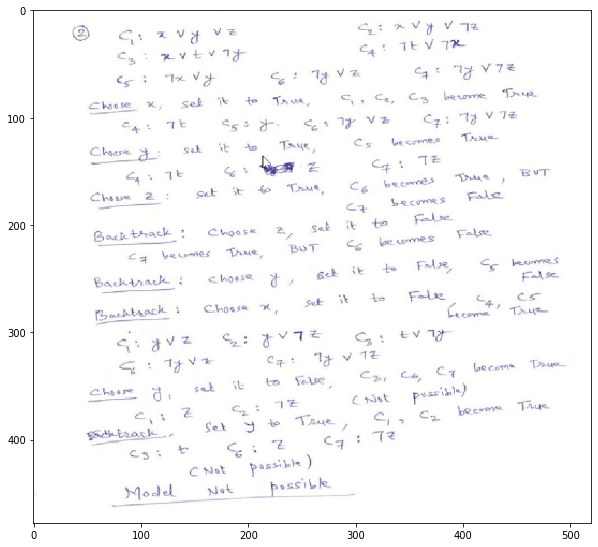

In [15]:
%pylab inline
plt.figure(figsize=(10,10))
img = mpimg.imread('example2.png')
imgplot = plt.imshow(img)
plt.show()

In [16]:
s = [['x','y','z'],['x','y','!z'],['x','t','!y'],['!t','!x'],['!x','y'],['!y','z'],['!y','!z']]
for clause in s:
    print(clause)
assignments=[]
if dpll(s,assignments) == 'satisfiable':
    print('Given CNF is satisfiable for the following assignments :')
    print_assignments(assignments)
else:
    print('unsatisfiable')

['x', 'y', 'z']
['x', 'y', '!z']
['x', 't', '!y']
['!t', '!x']
['!x', 'y']
['!y', 'z']
['!y', '!z']

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: []
Unit clause not found

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: []
Chosen Literal : !y
!y  added to assignments
After simplification :
['x', 'z']
['x', '!z']
['!t', '!x']
['!x']

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: ['!y']
Unit clause found : !x
!x  added to assignments
After simplification :
['z']
['!z']

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: ['!y', '!x']
Unit clause found : z
Contradiction z and ! z found
!y  does not satisfy CNF


## <a id='exec3'>6.3 Example 3</a>

In [17]:
s = [['A','B','!C','!D'],['D','!C','!A'],['B','C','D'],['C','!D'],['!A','!B','C']]
for clause in s:
    print(clause)
assignments=[]
if dpll(s,assignments) == 'satisfiable':
    print('Given CNF is satisfiable for the following assignments :')
    print_assignments(assignments)
else:
    print('unsatisfiable')

['A', 'B', '!C', '!D']
['D', '!C', '!A']
['B', 'C', 'D']
['C', '!D']
['!A', '!B', 'C']

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: []
Unit clause not found

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: []
Chosen Literal : C
C  added to assignments
After simplification :
['A', 'B', '!D']
['D', '!A']

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: ['C']
Unit clause not found

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: ['C']
Chosen Literal : !A
!A  added to assignments
After simplification :
['B', '!D']

-----------------------------------------------------------------------------------------------

## <a id='exec4'>6.4 Example 4</a>

In [18]:
s = [['!A','B'],['!B','!C'],['C','!D'],['!D','A'],['A','B','!C']]
for clause in s:
    print(clause)
assignments=[]
if dpll(s,assignments) == 'satisfiable':
    print('Given CNF is satisfiable for the following assignments :')
    print_assignments(assignments)
else:
    print('unsatisfiable')

['!A', 'B']
['!B', '!C']
['C', '!D']
['!D', 'A']
['A', 'B', '!C']

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: []
Unit clause not found

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: []
Chosen Literal : A
A  added to assignments
After simplification :
['B']
['!B', '!C']
['C', '!D']

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: ['A']
Unit clause found : B
B  added to assignments
After simplification :
['!C']
['C', '!D']

-------------------------------------------------------------------------------------------------------------------------
Assignments till now: ['A', 'B']
Unit clause found : !C
!C  added to assignments
After simplification :
['!D']

---------------------------------------------

# <a id='large_cnf'>7. Large CNF Clauses</a>
<a href='#index'>Go back to the top</a>

In [29]:
# ord(number) - 97
def generate_cnf():
    cnf_size = np.random.randint(60,70)
    cnf = []
    for i in range(cnf_size):
        temp = []
        clause_size = np.random.randint(1,40)
        for j in range(clause_size):
            literal = chr(np.random.randint(65,91))
            is_false = np.random.randint(0,2)
            if is_false == 1:
                literal = '!' + literal
            temp.append(literal)
        cnf.append(temp)
    return cnf    

In [33]:
s = generate_cnf()
i=1
for clause in s:
    print('\nClause number :',i,'is :',clause)
    i=i+1
assignments=[]
if dpll(s,assignments) == 'satisfiable':
    print('Given CNF is satisfiable for the following assignments :')
    print_assignments(assignments)
else:
    print('unsatisfiable')


Clause number : 1 is : ['!T', 'X', '!Y', 'E', 'D', '!X', '!Q', 'B', 'I', '!R', '!Y', 'A', '!H', 'M', 'X', 'C', 'K', '!D', 'G', 'G', '!O', '!Z', '!T', 'N', 'G', 'V', 'I', '!L', 'Z', '!T', 'F', '!N']

Clause number : 2 is : ['P', '!D', '!I', 'B']

Clause number : 3 is : ['J']

Clause number : 4 is : ['!X', '!T', 'B', 'H', 'R', '!K', '!Y', 'G', '!Q', '!F', 'H', '!O', 'O', 'F', 'K', '!S', '!Q', '!X', 'C', 'X']

Clause number : 5 is : ['K', '!G', '!V', 'I', 'T', '!P', '!F', 'C', 'V', '!L', '!J', '!A', '!T', '!S', 'O', '!V']

Clause number : 6 is : ['!N', '!C', 'V', 'K', '!D', 'H', '!Z', '!T', '!C', '!X', '!S', 'S', '!Q', 'X', '!T', '!O', 'M', '!I', 'Q', 'L', '!O', '!F', 'O', '!Z', 'Z', '!Q', 'C', '!F', '!O', 'O']

Clause number : 7 is : ['J', '!F', 'J', 'Y', '!U', '!V', 'I', 'U', '!R', 'Z', '!X', '!E', '!L', '!G', '!C', '!A', 'V', 'T', 'L', '!C', '!Y']

Clause number : 8 is : ['G', 'Z', 'Z', '!U', '!Y', '!W', 'N', 'M', '!W', 'S']

Clause number : 9 is : ['G', 'T', 'N', '!F', '!V', 'H', '!T

# <a id='final'>8. Final Remarks</a>
<a href='#index'>Go back to the top</a>

+ Final assignments of literals depend upon the heuristic function which is <a href='#choose_literal'>choose_literal function</a> from step-3.
+ In this program, <a href='#choose_literal'>choose_literal function</a> is a heuristic function that returns the literal which has highest frqequency in CNF clauses.
+ But different heuristic functions can be used and <a href='#choose_literal'>choose_literal function</a> can be changed accordingly. For ex. literal with minimum frequency can be returned, or literal from the shortest clause can be returned,etc.